In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "D:\swimcat2"
CATEGORIES = ["A-sky", "B-pattern", "C-thick-dark", "D-thick-white", "E-veil"]

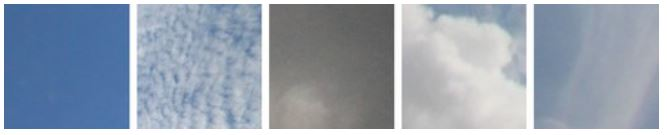

In [32]:
from IPython.display import Image, display
Image(filename="D:\Sample\swimcat_sample.jpg") #sample images from the dataset

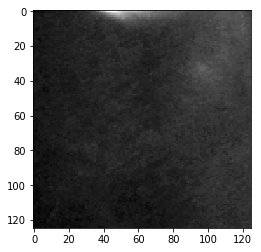

In [4]:
for category in CATEGORIES: #iteration to fetch images from directory  
    path = os.path.join(DATADIR,category)  # create path to cloud types from folder
    for img in os.listdir(path):  # iterate over each image in folder
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # read the images and convert to grayscale
        plt.imshow(img_array, cmap='gray')  # graph
        plt.show()  # display!

        break 
    break 

In [5]:
print(img_array)


[[102 103 103 ... 113 113 113]
 [103 103 103 ... 114 113 114]
 [104 104 104 ... 115 114 113]
 ...
 [101 101 101 ... 108 108 109]
 [101 100 101 ... 109 109 110]
 [101 101 101 ... 109 108 110]]


In [6]:
print(img_array.shape)

(125, 125)


In [7]:
IMG_SIZE = 125 #image resize to 256x256

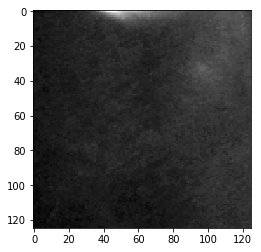

In [8]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data = []


In [10]:
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to dataset
        class_num = CATEGORIES.index(category)  # assign index 0 to 4 for 5 cloud classes
        print(class_num)
        for img in tqdm(os.listdir(path)):  # iterate over each image per cloud classes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

0


100%|██████████| 223/223 [00:00<00:00, 247.64it/s]


1


100%|██████████| 89/89 [00:00<00:00, 209.04it/s]


2


100%|██████████| 251/251 [00:00<00:00, 256.01it/s]


3


100%|██████████| 135/135 [00:00<00:00, 252.48it/s]


4


100%|██████████| 85/85 [00:00<00:00, 250.73it/s]


783


In [11]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]: #random shuffle of cloud categorie images with class_labels
    print(sample[1])

4
0
2
0
2
0
2
2
4
0


In [21]:
X = [] #setting X as set of features
y = [] #setting Y as set of labels

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(np.min(y), np.max(y))

[[[[178]
   [179]
   [179]
   ...
   [213]
   [212]
   [212]]

  [[179]
   [179]
   [179]
   ...
   [211]
   [212]
   [213]]

  [[178]
   [178]
   [178]
   ...
   [212]
   [212]
   [210]]

  ...

  [[195]
   [194]
   [194]
   ...
   [223]
   [223]
   [222]]

  [[195]
   [195]
   [195]
   ...
   [224]
   [223]
   [223]]

  [[195]
   [196]
   [195]
   ...
   [224]
   [224]
   [223]]]]
0 4


In [14]:
import pickle #to save data

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X.pickle","rb") #to load data
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
import tensorflow as tf #experimental part results and please consider it as a play ground not effective code help needed
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [17]:
X = X/255.0
y=keras.utils.to_categorical(y, 5)


model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) #accuracy

result=model.fit(X, y, batch_size=32, epochs=50, validation_split=0.2)


W0729 13:59:24.262863  1572 deprecation.py:506] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 626 samples, validate on 157 samples
Epoch 1/50
626/626 [==============================] - ETA: 2:16 - loss: 1.6115 - acc: 0.187 - ETA: 2:11 - loss: 7.7598 - acc: 0.218 - ETA: 2:00 - loss: 8.2131 - acc: 0.218 - ETA: 1:52 - loss: 7.2191 - acc: 0.195 - ETA: 1:44 - loss: 6.3186 - acc: 0.218 - ETA: 1:35 - loss: 5.5791 - acc: 0.250 - ETA: 1:27 - loss: 5.0111 - acc: 0.236 - ETA: 1:20 - loss: 4.6186 - acc: 0.242 - ETA: 1:12 - loss: 4.2828 - acc: 0.256 - ETA: 1:05 - loss: 4.0152 - acc: 0.262 - ETA: 58s - loss: 3.7988 - acc: 0.261 - ETA: 51s - loss: 3.6138 - acc: 0.27 - ETA: 44s - loss: 3.4616 - acc: 0.26 - ETA: 37s - loss: 3.3323 - acc: 0.26 - ETA: 31s - loss: 3.2163 - acc: 0.25 - ETA: 24s - loss: 3.1050 - acc: 0.27 - ETA: 17s - loss: 3.0108 - acc: 0.27 - ETA: 10s - loss: 2.9374 - acc: 0.27 - ETA: 3s - loss: 2.8622 - acc: 0.2812 - 145s 232ms/sample - loss: 2.8201 - acc: 0.2907 - val_loss: 1.4360 - val_acc: 0.3949
Epoch 2/50
626/626 [==============================] - ETA: 1:59 - loss: 

626/626 [==============================] - ETA: 2:22 - loss: 0.7085 - acc: 0.687 - ETA: 2:13 - loss: 0.7473 - acc: 0.656 - ETA: 2:06 - loss: 0.7601 - acc: 0.677 - ETA: 1:57 - loss: 0.7056 - acc: 0.687 - ETA: 1:51 - loss: 0.7402 - acc: 0.681 - ETA: 1:42 - loss: 0.7624 - acc: 0.661 - ETA: 1:33 - loss: 0.7626 - acc: 0.656 - ETA: 1:24 - loss: 0.7430 - acc: 0.660 - ETA: 1:16 - loss: 0.7389 - acc: 0.663 - ETA: 1:09 - loss: 0.7605 - acc: 0.659 - ETA: 1:02 - loss: 0.7626 - acc: 0.664 - ETA: 54s - loss: 0.7520 - acc: 0.669 - ETA: 47s - loss: 0.7707 - acc: 0.65 - ETA: 40s - loss: 0.7646 - acc: 0.66 - ETA: 32s - loss: 0.7661 - acc: 0.66 - ETA: 25s - loss: 0.7694 - acc: 0.65 - ETA: 18s - loss: 0.7758 - acc: 0.65 - ETA: 11s - loss: 0.7815 - acc: 0.64 - ETA: 4s - loss: 0.7858 - acc: 0.6414 - 151s 241ms/sample - loss: 0.7933 - acc: 0.6358 - val_loss: 0.7859 - val_acc: 0.6561
Epoch 11/50
626/626 [==============================] - ETA: 1:47 - loss: 0.7667 - acc: 0.562 - ETA: 1:44 - loss: 0.7270 - acc: 

626/626 [==============================] - ETA: 1:43 - loss: 0.6959 - acc: 0.718 - ETA: 1:38 - loss: 0.6520 - acc: 0.750 - ETA: 1:32 - loss: 0.6149 - acc: 0.770 - ETA: 1:26 - loss: 0.6119 - acc: 0.789 - ETA: 1:21 - loss: 0.6473 - acc: 0.737 - ETA: 1:15 - loss: 0.6509 - acc: 0.734 - ETA: 1:10 - loss: 0.6452 - acc: 0.741 - ETA: 1:04 - loss: 0.6586 - acc: 0.742 - ETA: 58s - loss: 0.6969 - acc: 0.725 - ETA: 53s - loss: 0.6774 - acc: 0.73 - ETA: 47s - loss: 0.6954 - acc: 0.72 - ETA: 42s - loss: 0.6720 - acc: 0.72 - ETA: 36s - loss: 0.6759 - acc: 0.72 - ETA: 31s - loss: 0.6962 - acc: 0.70 - ETA: 25s - loss: 0.6990 - acc: 0.70 - ETA: 19s - loss: 0.6819 - acc: 0.71 - ETA: 14s - loss: 0.6896 - acc: 0.70 - ETA: 8s - loss: 0.7060 - acc: 0.7066 - ETA: 3s - loss: 0.7153 - acc: 0.697 - 119s 191ms/sample - loss: 0.7157 - acc: 0.6933 - val_loss: 0.8092 - val_acc: 0.6752
Epoch 20/50
626/626 [==============================] - ETA: 1:43 - loss: 0.7849 - acc: 0.656 - ETA: 1:39 - loss: 0.7809 - acc: 0.640 

626/626 [==============================] - ETA: 1:42 - loss: 0.6211 - acc: 0.781 - ETA: 1:37 - loss: 0.5615 - acc: 0.750 - ETA: 1:32 - loss: 0.6135 - acc: 0.750 - ETA: 1:27 - loss: 0.6136 - acc: 0.734 - ETA: 1:22 - loss: 0.6171 - acc: 0.737 - ETA: 1:16 - loss: 0.6641 - acc: 0.729 - ETA: 1:10 - loss: 0.6402 - acc: 0.750 - ETA: 1:04 - loss: 0.6548 - acc: 0.742 - ETA: 59s - loss: 0.6677 - acc: 0.743 - ETA: 53s - loss: 0.6524 - acc: 0.75 - ETA: 48s - loss: 0.6591 - acc: 0.75 - ETA: 42s - loss: 0.6732 - acc: 0.75 - ETA: 37s - loss: 0.6773 - acc: 0.74 - ETA: 31s - loss: 0.6781 - acc: 0.74 - ETA: 25s - loss: 0.6790 - acc: 0.73 - ETA: 20s - loss: 0.6832 - acc: 0.73 - ETA: 14s - loss: 0.6881 - acc: 0.73 - ETA: 8s - loss: 0.6826 - acc: 0.7396 - ETA: 3s - loss: 0.6686 - acc: 0.745 - 120s 192ms/sample - loss: 0.6648 - acc: 0.7460 - val_loss: 0.7731 - val_acc: 0.7070
Epoch 29/50
626/626 [==============================] - ETA: 1:40 - loss: 0.8013 - acc: 0.625 - ETA: 1:36 - loss: 0.6500 - acc: 0.687 

626/626 [==============================] - ETA: 55s - loss: 0.7020 - acc: 0.78 - ETA: 53s - loss: 0.6626 - acc: 0.79 - ETA: 50s - loss: 0.6443 - acc: 0.77 - ETA: 48s - loss: 0.6243 - acc: 0.78 - ETA: 45s - loss: 0.6100 - acc: 0.78 - ETA: 42s - loss: 0.5955 - acc: 0.79 - ETA: 38s - loss: 0.6067 - acc: 0.78 - ETA: 35s - loss: 0.6019 - acc: 0.79 - ETA: 32s - loss: 0.5920 - acc: 0.80 - ETA: 29s - loss: 0.5991 - acc: 0.78 - ETA: 26s - loss: 0.5868 - acc: 0.79 - ETA: 23s - loss: 0.5875 - acc: 0.78 - ETA: 20s - loss: 0.5802 - acc: 0.78 - ETA: 17s - loss: 0.5849 - acc: 0.78 - ETA: 14s - loss: 0.5962 - acc: 0.77 - ETA: 11s - loss: 0.6211 - acc: 0.77 - ETA: 7s - loss: 0.6203 - acc: 0.7739 - ETA: 4s - loss: 0.6124 - acc: 0.779 - ETA: 1s - loss: 0.6226 - acc: 0.771 - 65s 104ms/sample - loss: 0.6188 - acc: 0.7716 - val_loss: 0.7536 - val_acc: 0.7643
Epoch 38/50
626/626 [==============================] - ETA: 55s - loss: 0.5582 - acc: 0.78 - ETA: 52s - loss: 0.5326 - acc: 0.78 - ETA: 50s - loss: 0.5

626/626 [==============================] - ETA: 55s - loss: 0.5331 - acc: 0.78 - ETA: 52s - loss: 0.7231 - acc: 0.76 - ETA: 52s - loss: 0.6689 - acc: 0.77 - ETA: 49s - loss: 0.6457 - acc: 0.76 - ETA: 46s - loss: 0.6248 - acc: 0.75 - ETA: 43s - loss: 0.6938 - acc: 0.73 - ETA: 39s - loss: 0.6793 - acc: 0.75 - ETA: 36s - loss: 0.7111 - acc: 0.74 - ETA: 33s - loss: 0.7297 - acc: 0.73 - ETA: 30s - loss: 0.7050 - acc: 0.74 - ETA: 26s - loss: 0.7132 - acc: 0.74 - ETA: 23s - loss: 0.7658 - acc: 0.72 - ETA: 20s - loss: 0.7357 - acc: 0.74 - ETA: 17s - loss: 0.7294 - acc: 0.74 - ETA: 14s - loss: 0.7276 - acc: 0.74 - ETA: 11s - loss: 0.7235 - acc: 0.74 - ETA: 7s - loss: 0.7021 - acc: 0.7555 - ETA: 4s - loss: 0.6920 - acc: 0.758 - ETA: 1s - loss: 0.7056 - acc: 0.754 - 66s 105ms/sample - loss: 0.7019 - acc: 0.7540 - val_loss: 0.9422 - val_acc: 0.6943
Epoch 47/50
626/626 [==============================] - ETA: 59s - loss: 0.9686 - acc: 0.75 - ETA: 54s - loss: 0.9024 - acc: 0.68 - ETA: 51s - loss: 0.8

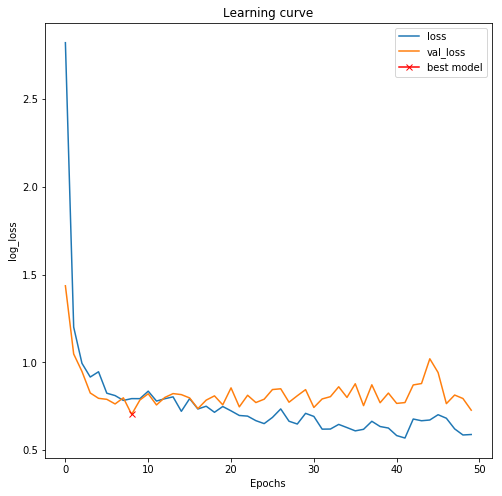

In [18]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(result.history["loss"], label="loss")
plt.plot(result.history["val_loss"], label="val_loss")
plt.plot( np.argmin(result.history["val_loss"]), np.min(result.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 256)     2560      
_________________________________________________________________
activation (Activation)      (None, 123, 123, 256)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 59, 59, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 215296)            0